# CONTENTS

## 1. Importing libraries (including geospatial)

## 2. Importing '.jason' and 'Core_Metrics_Clean_Renamed.csv' data:

## 3. Conducting consistency checks

### 3.1. Checking for missing values

### 3.2. Checking for duplicates

### 3.3. Checking for extreme values

## 4. Plotting a coropleth for "Median Days on Market"

## 5. Exporting 'core_met' with imputed missing values

In [10]:
# ___________________________________________________

## 1. Importing libraries (including geospatial)

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import os
import folium
import json

In [4]:
# Making charts displayed in the notebook without calling:

%matplotlib inline

## 2. Importing '.jason' and 'Core_Metrics_Clean_Renamed.csv' data:

In [12]:
# Importing ".json" file for the US:

country_geo = r'/Users/elena/Documents/Data Analytics Course/6. Advanced Analytics and Dashboard Design/us-states.json'

country_geo

'/Users/elena/Documents/Data Analytics Course/6. Advanced Analytics and Dashboard Design/us-states.json'

In [14]:
# Looking at the JSON file contents:

f = open(r'/Users/elena/Documents/Data Analytics Course/6. Advanced Analytics and Dashboard Design/us-states.json',)
  
# returns JSON object asa dictionary:

data = json.load(f)
  
# Iterating through the json list:

for i in data['features']:
    print(i)

{'type': 'Feature', 'id': 'AL', 'properties': {'name': 'Alabama'}, 'geometry': {'type': 'Polygon', 'coordinates': [[[-87.359296, 35.00118], [-85.606675, 34.984749], [-85.431413, 34.124869], [-85.184951, 32.859696], [-85.069935, 32.580372], [-84.960397, 32.421541], [-85.004212, 32.322956], [-84.889196, 32.262709], [-85.058981, 32.13674], [-85.053504, 32.01077], [-85.141136, 31.840985], [-85.042551, 31.539753], [-85.113751, 31.27686], [-85.004212, 31.003013], [-85.497137, 30.997536], [-87.600282, 30.997536], [-87.633143, 30.86609], [-87.408589, 30.674397], [-87.446927, 30.510088], [-87.37025, 30.427934], [-87.518128, 30.280057], [-87.655051, 30.247195], [-87.90699, 30.411504], [-87.934375, 30.657966], [-88.011052, 30.685351], [-88.10416, 30.499135], [-88.137022, 30.318396], [-88.394438, 30.367688], [-88.471115, 31.895754], [-88.241084, 33.796253], [-88.098683, 34.891641], [-88.202745, 34.995703], [-87.359296, 35.00118]]]}}
{'type': 'Feature', 'id': 'AK', 'properties': {'name': 'Alaska'},

In [17]:
# Importing 'Core_Metrics_Clean_Renamed.csv':

path = r'/Users/elena/Documents/Data Analytics Course/6. Advanced Analytics and Dashboard Design'

core_met = pd.read_csv(os.path.join(path, 'Core_Metrics_Clean_Renamed.csv'))

In [18]:
core_met.head()

,Unnamed: 0.1,Unnamed: 0,Date,State,State ID,Median Listing Price,No. Active Listings,Median Days on Market,No. New Listings,No. Increased Price,No. Reduced Price,No. Pending Listings,Median Sq Ft Price,Median Sq Feet,Avg Listing Price,No. Total Listings,Pending Ratio
0,0,0,202301,Colorado,CO,577000,12401,82,6242,262,3834,5720.0,271,2129,1164082,18025,0.4613
1,1,1,202301,Wisconsin,WI,362400,5988,81,3278,66,1228,3518.0,197,1772,446116,9504,0.5875
2,2,2,202301,Nebraska,NE,347600,3117,75,1688,134,554,1991.0,169,2133,387946,5099,0.6387
3,3,3,202301,Kansas,KS,282450,4498,84,2414,162,936,2957.0,146,2016,396225,7479,0.6575
4,4,4,202301,West Virginia,WV,209950,2791,86,1220,48,636,1556.0,118,1726,289530,4355,0.5576


In [19]:
core_met.shape

(4029, 17)

## 3. Conducting consistency checks

### 3.1. Checking for missing values

In [20]:
core_met.isnull().sum()

Unnamed: 0.1              0
Unnamed: 0                0
Date                      0
State                     0
State ID                  0
Median Listing Price      0
No. Active Listings       0
Median Days on Market     0
No. New Listings          0
No. Increased Price       0
No. Reduced Price         0
No. Pending Listings     27
Median Sq Ft Price        0
Median Sq Feet            0
Avg Listing Price         0
No. Total Listings        0
Pending Ratio            27
dtype: int64

In [22]:
# Imputing missing values with median:

core_met['No. Pending Listings'].fillna(core_met['No. Pending Listings'].median(), inplace=True)
core_met['Pending Ratio'].fillna(core_met['Pending Ratio'].median(), inplace=True)

core_met.isnull().sum()

Unnamed: 0.1             0
Unnamed: 0               0
Date                     0
State                    0
State ID                 0
Median Listing Price     0
No. Active Listings      0
Median Days on Market    0
No. New Listings         0
No. Increased Price      0
No. Reduced Price        0
No. Pending Listings     0
Median Sq Ft Price       0
Median Sq Feet           0
Avg Listing Price        0
No. Total Listings       0
Pending Ratio            0
dtype: int64

### 3.2. Checking for duplicates

In [25]:
dups = core_met.duplicated()

dups.shape

(4029,)

#### Comments:

No duplicate detected.

__________________________________

### 3.3. Checking for extreme values

<AxesSubplot:xlabel='Median Listing Price', ylabel='Count'>

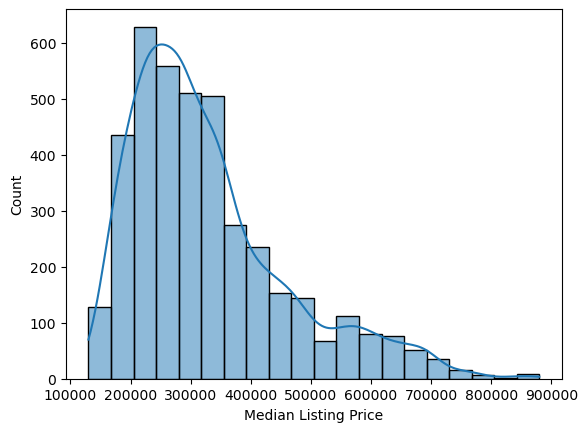

In [26]:
 # Showing extreme values for 'Median Listing Price':

sns.histplot(core_met['Median Listing Price'], bins=20, kde = True)

<AxesSubplot:xlabel='No. Active Listings', ylabel='Count'>

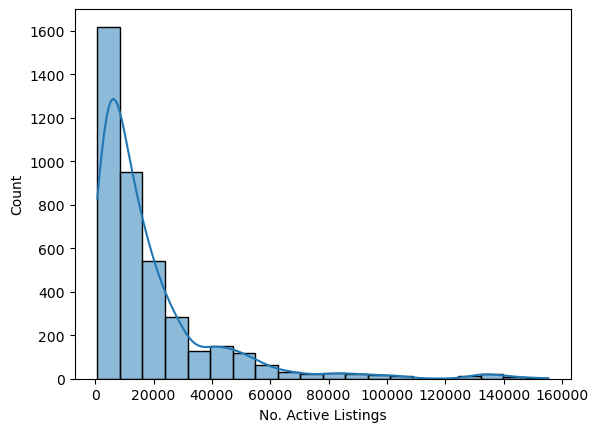

In [27]:
 # Showing extreme values for 'No. Active Listings':

sns.histplot(core_met['No. Active Listings'], bins=20, kde = True)

<AxesSubplot:xlabel='Median Days on Market', ylabel='Count'>

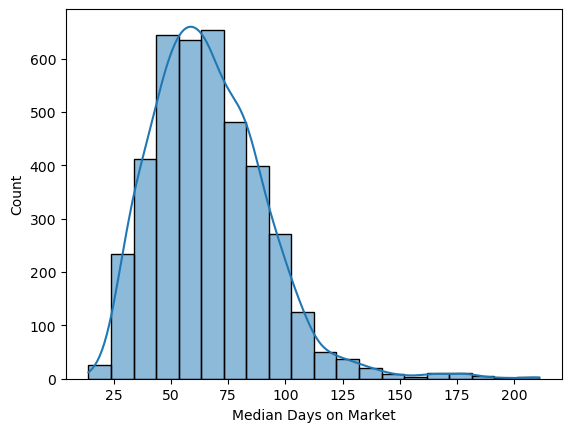

In [28]:
# Showing extreme values for 'Median Days on Market':

sns.histplot(core_met['Median Days on Market'], bins=20, kde = True)

<AxesSubplot:xlabel='No. New Listings', ylabel='Count'>

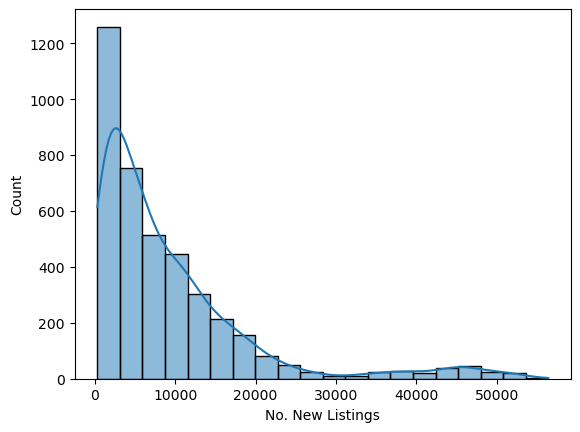

In [29]:
# Showing extreme values for 'No. New Listings':

sns.histplot(core_met['No. New Listings'], bins=20, kde = True)

<AxesSubplot:xlabel='No. Increased Price', ylabel='Count'>

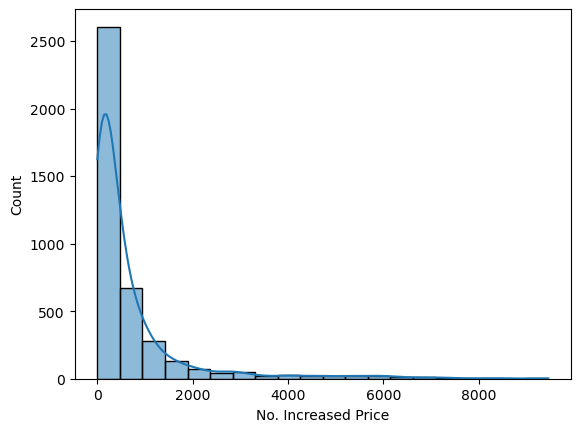

In [30]:
# Showing extreme values for 'No. Increased Price':

sns.histplot(core_met['No. Increased Price'], bins=20, kde = True)

<AxesSubplot:xlabel='No. Reduced Price', ylabel='Count'>

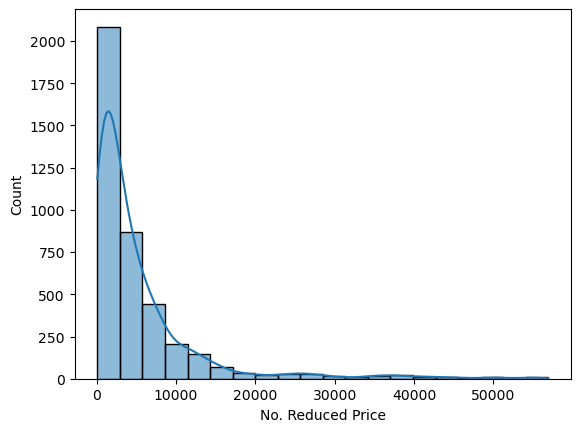

In [31]:
# Showing extreme values for 'No. Reduced Price':

sns.histplot(core_met['No. Reduced Price'], bins=20, kde = True)

In [ ]:
# Showing extreme values for 'No. Pending Listings':

sns.histplot(core_met['No. Pending Listings'], bins=20, kde = True)

<AxesSubplot:xlabel='Median Sq Ft Price', ylabel='Count'>

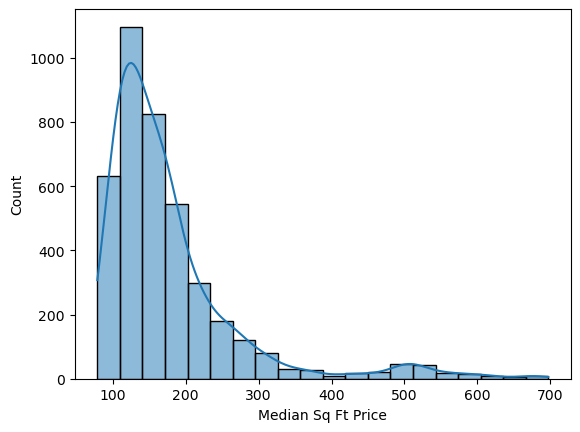

In [33]:
# Showing extreme values for 'Median Sq Ft Price':

sns.histplot(core_met['Median Sq Ft Price'], bins=20, kde = True)

<AxesSubplot:xlabel='Median Sq Feet', ylabel='Count'>

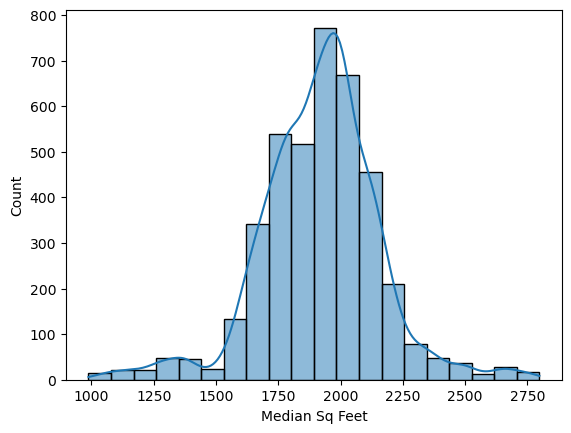

In [34]:
# Showing extreme values for 'Median Sq Feet':

sns.histplot(core_met['Median Sq Feet'], bins=20, kde = True)

<AxesSubplot:xlabel='Avg Listing Price', ylabel='Count'>

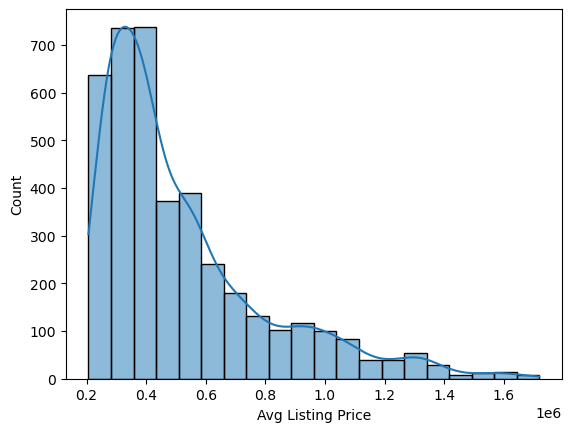

In [35]:
# Showing extreme values for 'Avg Listing Price':

sns.histplot(core_met['Avg Listing Price'], bins=20, kde = True)

<AxesSubplot:xlabel='No. Total Listings', ylabel='Count'>

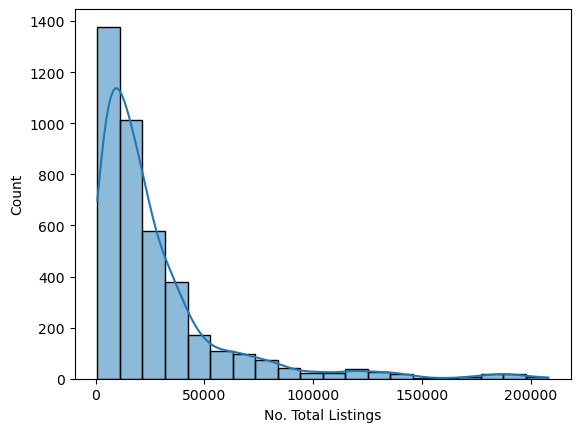

In [36]:
# Showing extreme values for 'No. Total Listings':

sns.histplot(core_met['No. Total Listings'], bins=20, kde = True)

<AxesSubplot:xlabel='Pending Ratio', ylabel='Count'>

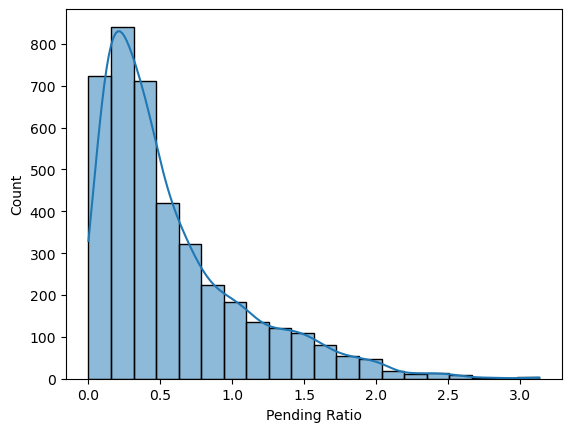

In [37]:
# Showing extreme values for 'Pending Ratio':

sns.histplot(core_met['Pending Ratio'], bins=20, kde = True)

#### Comments:

I have decided to keep all the variables AS IS. Even though most of the plots are very much right skewed, the extreme values are not impossible in real estate, and I did not want to have some of the US states as "empty" on the coropleth.

_____________________________________

## 4. Plotting a coropleth for "Median Days on Market"

In [38]:
# Creating a data frame with just the states and the values for 'Median Days on Market':

data_to_plot = core_met[['State','Median Days on Market']]

data_to_plot.head()

,State,Median Days on Market
0,Colorado,82
1,Wisconsin,81
2,Nebraska,75
3,Kansas,84
4,West Virginia,86


In [39]:
# Setting up a folium map at a high-level zoom:

map = folium.Map(location = [100, 0], zoom_start = 1.5)

In [40]:
# Binding Pandas Data Frames and json geometries:

folium.Choropleth(
    geo_data = country_geo, 
    data = data_to_plot,
    columns = ['State', 'Median Days on Market'],
    key_on = 'feature.properties.name',
    fill_color = 'YlGnBu', fill_opacity = 0.6, line_opacity = 0.1,
    legend_name = "Median Days on Market").add_to(map)
folium.LayerControl().add_to(map)

map

#### Comments:

- I was surprised to find out Vermont is the slowest in terms of selling a property - it takes the most days for a property in Vermont to stay on market before it is sold. And Main is not much faster.
- The market is the fastest in California, Oregon, Utah and Nebraka, where it takes under 57 days for a property to stay on the market.
- My home state of Massachusetts turned out to be faster than the state of New York, to my surprise.

##### Does the analysis answer any of your existing research questions?

- What are the hottest markets in the US? What are the demand trends, and which states have the least demand?

Days on the market is one of the defining factors when determining demand. So this coropleth helps us to preliminarily conclude what states are potential candidates to win the top state with the highest real estate demand.

##### Does the analysis lead you to any new research questions?

There could be quite a few interesting questions I would like to have answers to (even though they questions do not fit the original direction of the analysis): Why properties in Vermont stay on the market for so long? Why Nebraska and Utah selling their properties like hot cakes? Why Hawaii, being an attractive destination, takes up to 97 days to sell? Same is about New York? While Alaska's properties are selling unexpectedly well?

________________________________________

In [41]:
map.save('plot_data.html')

## 5. Exporting 'core_met' with imputed missing values

In [42]:
# Exporting 'core_met' as 'Core_Metrics_Clean_Renamed_0missing.csv':

core_met.to_csv(os.path.join(path, 'Core_Metrics_Clean_Renamed_0missing.csv'))